<a href="https://colab.research.google.com/github/Srijanee21231/Basic-python-Programs/blob/main/ACB_Assignment_1_Srijanee_Gupta_MT21231_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Name: Srijanee Gupta**

##**Roll No. MT21231**

##**Mtech CB | 2021-2023**

**Assignment 1**

The potential energy function dictates the structure of a biomolecule. In
particular, the most stable structure corresponds to the global minimum in the
(free) energy function. So, finding the global minimum in a complex free energy
surface is one of the most important step the structure prediction of the peptides
or proteins. A number of numerical algorithms are available which either use the
energy values, or their first derivative and second derivative information to locate
the minimum. In order to find the global minimum this procedure should be
performed for the entire range of different structural parameters (bond lengths,
bond angles and dihedral angles). In order to get an understanding about this
procedure here a model potential energy function is provided which has the
following form:



**Equation 1**

**(r) = ((r-1.0)*(r+2.0)*(r-3.0))^2 -10**

##Do the following tasks.



### **(i) Plot the potential energy function in the range -5 to 5 (use any tools such as xmgrace, grace, matlab,matplotlib)**


In [1]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Values of x:  [-5.    -4.999 -4.998 ...  4.998  4.999  5.   ]
Values of y:  [20726.         20700.09299265 20674.21195722 ...  3114.81581273
  3120.40395461  3126.00000002]


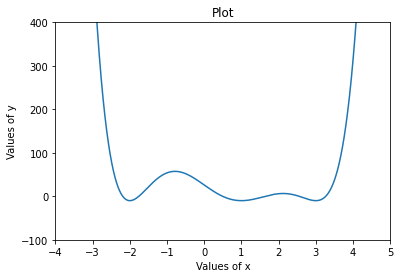

In [2]:
x = np.arange(-5, 5.0001,0.001)
y = ((x - 1.0)*(x + 2.0)*(x - 3.0))**2 - 10
print('Values of x: ', x)
print('Values of y: ', y)
plt.plot(x, y)
plt.title("Plot")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.xlim([-4, 5])
plt.ylim([-100, 400])
plt.show()

####...

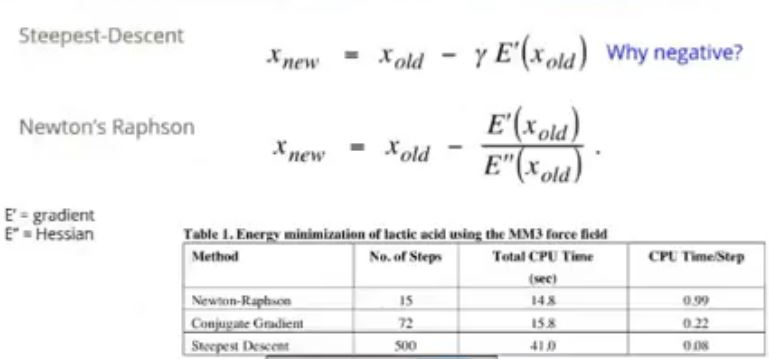

###**(ii) Write a program to find all the minimums in this function using Steepest descent method and Newton’s Raphson method**



**Steepest Descent**

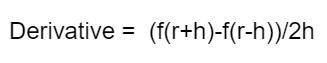

In [3]:
#Steepest Descent Algorithm

import random
df_sd = pd.DataFrame()
  
range_min = - 5.0
range_max = 5.0
rdis = 0.001
rfact = 0.0004   #gamma of steepest descent formula-random value

for i in range(1,10):
  rval = random.randint(range_min,range_max)
  xinit = rval

  for j in range(1,1000):
    xval1 = xinit - rdis
    xval2 = xinit + rdis

    yval1 = ((xval1 - 1.0)*(xval1 + 2.0)*(xval1 - 3.0))**2 - 10
    yval2 = ((xval2 - 1.0)*(xval2 + 2.0)*(xval2 - 3.0))**2 - 10

    deri = (yval2-yval1)/(2.0*rdis)
    x_old = xinit
    xinit = xinit - rfact*deri  #Steepest descent formula 
    dx = xinit - x_old
    
    if(i>1 and dx<10**-8):
        break
    s = pd.DataFrame([[i, xinit, x_old, dx, deri]], columns = ['i', 'xinit', 'x_old', 'dx(minima)', 'derivative'])
    df_sd = df_sd.append(s, ignore_index = True)

In [4]:
df_sd

,i,xinit,x_old,dx(minima),derivative
0,1,-0.695999,-4.000000,3.304001e+00,-8260.001792
1,1,-0.691011,-0.695999,4.987826e-03,-12.469564
2,1,-0.685760,-0.691011,5.251499e-03,-13.128747
3,1,-0.680232,-0.685760,5.527633e-03,-13.819083
4,1,-0.674416,-0.680232,5.816629e-03,-14.541572
...,...,...,...,...,...
1546,6,1.000000,1.000000,1.150667e-08,-0.000029
1547,6,1.000000,1.000000,1.117527e-08,-0.000028
1548,6,1.000000,1.000000,1.085343e-08,-0.000027
1549,6,1.000000,1.000000,1.054085e-08,-0.000026


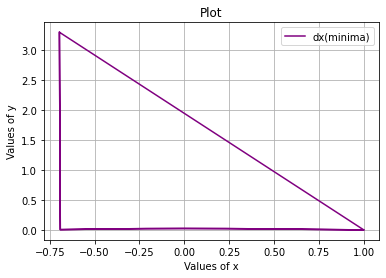

 
****************************************************************************************************************************************************************************


In [5]:

df_sd.plot(kind='line',x='xinit',y='dx(minima)',color='Purple')
plt.title("Plot")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
#plt.xlim([-1,1])
#plt.ylim([-3, 4])
plt.grid()
plt.show()
print(" ")
print("****************************************************************************************************************************************************************************")

**Newton's Raphson Method**

Derivative:

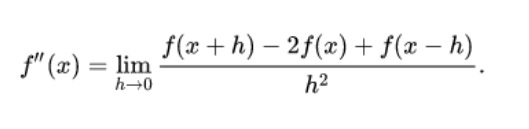

In [6]:
#Newton's Rhapson Algorithm

import random
df_nr = pd.DataFrame()
  
range_min = - 5.0
range_max = 5.0
rdis = 0.001
#rfact = 0.0004   #gamma of steepest descent formula-random value

for i in range(1,10):
  rval = random.randint(range_min,range_max)
  xinit = rval

  for j in range(1,1000):
    xval1 = xinit - rdis
    xval2 = xinit + rdis

    yval1 = ((xval1 - 1.0)*(xval1 + 2.0)*(xval1 - 3.0))**2 - 10
    yval2 = ((xval2 - 1.0)*(xval2 + 2.0)*(xval2 - 3.0))**2 - 10


    deri = (yval2-yval1)/(2.0*rdis)
    deri2 = (yval2 - xinit + yval1)/(rdis**2)
    x_old = xinit
    xinit = xinit - (deri/deri2)  #Newton's Raphson formula 
    dx = xinit - x_old
    
    if(i>1 and dx<10**-8):
        break
    s = pd.DataFrame([[i, xinit, x_old, dx, deri]], columns = ['i', 'xinit', 'x_old', 'dx(minima)', 'derivative'])
    df_nr = df_nr.append(s, ignore_index = True)

In [7]:
df_nr

,i,xinit,x_old,dx(minima),derivative
0,1,-3.999999,-4.000000,8.442347e-07,-8260.001792
1,1,-3.999998,-3.999999,8.442350e-07,-8259.992605
2,1,-3.999997,-3.999998,8.442353e-07,-8259.983418
3,1,-3.999997,-3.999997,8.442355e-07,-8259.974231
4,1,-3.999996,-3.999997,8.442358e-07,-8259.965044
...,...,...,...,...,...
3991,9,-4.999378,-4.999378,6.253221e-07,-25903.852620
3992,9,-4.999377,-4.999378,6.253222e-07,-25903.836374
3993,9,-4.999377,-4.999377,6.253223e-07,-25903.820128
3994,9,-4.999376,-4.999377,6.253224e-07,-25903.803883


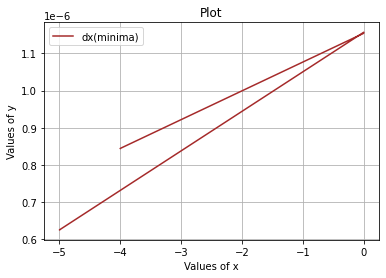

 
****************************************************************************************************************************************************************************


In [8]:
df_nr.plot(kind='line',x='xinit',y='dx(minima)',color='brown')
plt.title("Plot")
plt.xlabel("Values of x")
plt.ylabel("Values of y")
#plt.xlim([-1,1])
#plt.ylim([-3, 4])
plt.grid()
plt.show()
print(" ")
print("****************************************************************************************************************************************************************************")

### **(iii) Provide details about the global minimum after locating all the minima.**



**Steepest Descent Method - Minima**

In [9]:
tablesd = pd.DataFrame()

for n in range(1,10):
    lst = df_sd.loc[df_sd['i'] == n, 'dx(minima)']
    lst.tolist()
    x= lst.min()
    y = df_sd.loc[df_sd['dx(minima)'] == x]
    tablesd = tablesd.append(y, ignore_index = True)
    y.iloc[0:0]
    

In [10]:
tablesd

,i,xinit,x_old,dx(minima),derivative
0,1,1.0,1.0,2.198242e-14,-5.506706e-11
1,1,1.0,1.0,1.023727e-08,-2.559318e-05
2,6,1.0,1.0,1.023727e-08,-2.559318e-05


In [11]:
#final results:
tsd = pd.DataFrame(tablesd)
# Sorting by column 'i'
tsd.sort_values(by=['i'])

tsd.drop_duplicates(subset=['i'])

,i,xinit,x_old,dx(minima),derivative
0,1,1.0,1.0,2.198242e-14,-5.506706e-11
2,6,1.0,1.0,1.023727e-08,-2.559318e-05


**Newton's Raphson Method - Minima**


In [12]:
tablenr = pd.DataFrame()

for n in range(1,10):
    lst = df_nr.loc[df_nr['i'] == n, 'dx(minima)']
    lst.tolist()
    x= lst.min()
    y = df_nr.loc[df_nr['dx(minima)'] == x]
    tablenr = tablenr.append(y, ignore_index = True)
    y.iloc[0:0]

In [13]:
tablenr

,i,xinit,x_old,dx(minima),derivative
0,1,-3.999999,-4.0,8.442347e-07,-8260.001792
1,3,0.000001,0.0,1.153845e-06,-59.999968
2,4,-4.999999,-5.0,6.252258e-07,-25920.003348
3,9,-4.999999,-5.0,6.252258e-07,-25920.003348
4,4,-4.999999,-5.0,6.252258e-07,-25920.003348
5,9,-4.999999,-5.0,6.252258e-07,-25920.003348


In [14]:
#final results:
tnr = pd.DataFrame(tablenr)
# Sorting by column 'i'
tnr.sort_values(by=['i'])

tnr.drop_duplicates(subset=['i'])

,i,xinit,x_old,dx(minima),derivative
0,1,-3.999999,-4.0,8.442347e-07,-8260.001792
1,3,0.000001,0.0,1.153845e-06,-59.999968
2,4,-4.999999,-5.0,6.252258e-07,-25920.003348
3,9,-4.999999,-5.0,6.252258e-07,-25920.003348


### **(iv) Provide details about the timings taken by these two algorithms in finding the global minimum**

####Steepest Descent Method = 1 second

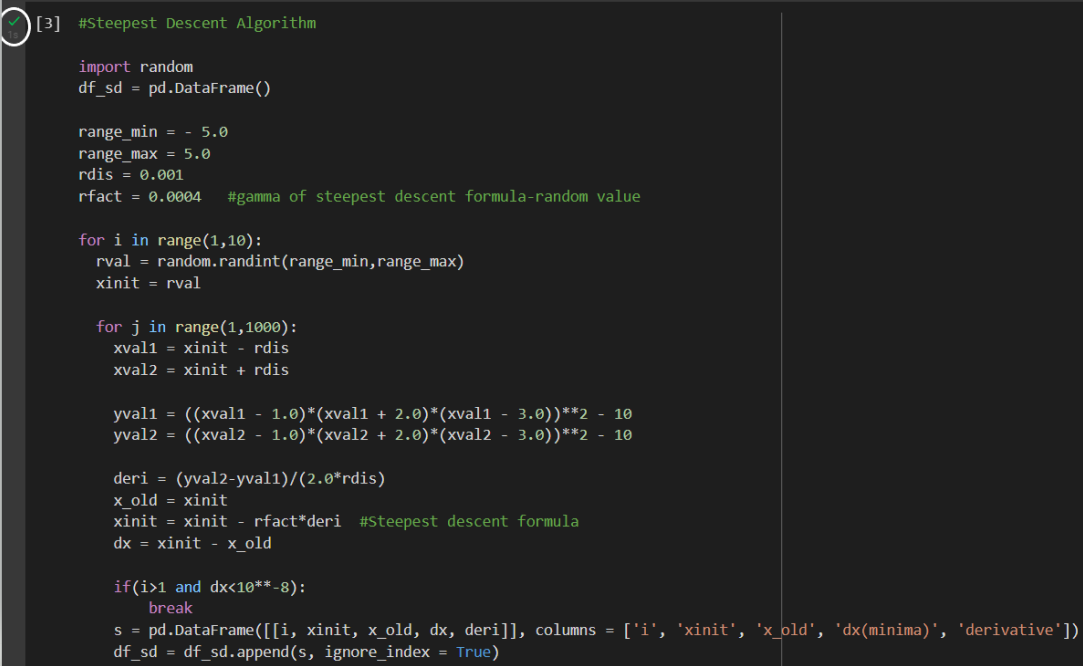

####Newton's Raphson Method = 6 seconds

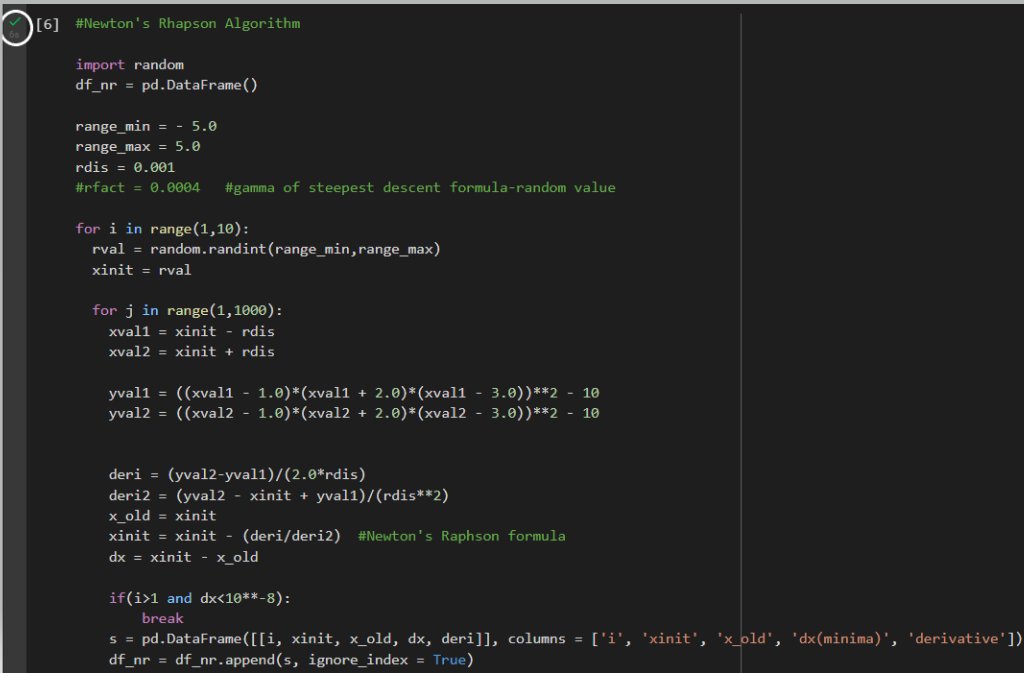

## CONCLUSION

## Everytime the code runs, Newton's Raphson algorithm takes more time than Steepest Descent algorithm.